# **Ejemplo QUBO arbitraria**

In [3]:
import networkx as nx
from collections import defaultdict
from dwave.samplers import SimulatedAnnealingSampler
from dwave.system import *
import matplotlib.pyplot as plt
import dimod
import neal

In [4]:
G = nx.Graph()
G.add_edges_from([(0,4),(0,5),(1,2),(1,6),(2,4),(3,7),(5,6),(6,7)])

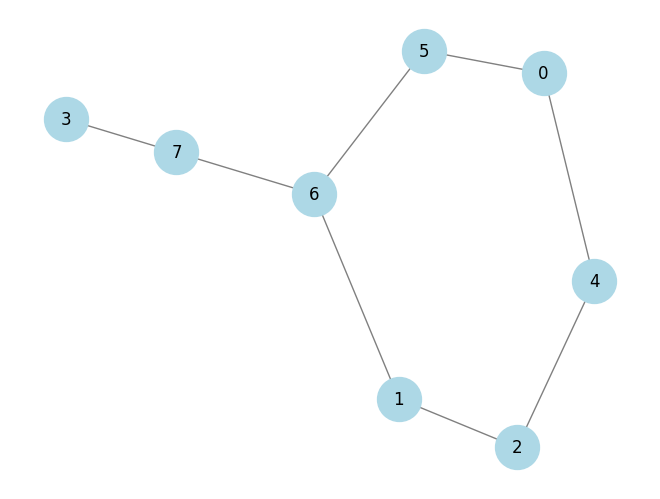

In [9]:
nx.draw(G, with_labels=True, node_size=1000, node_color='lightblue', edge_color='gray')

In [15]:
Q = defaultdict(int)

# Restricciones

for i in range(8):
    Q[(i,i)] += -7
    for j in range(i+1,8):
        Q[(i,j)] += 2

# función QUBO

for i,j in G.edges:
     Q[(i,i)] += 1
     Q[(j,j)] += 1
     Q[(i,j)] += -2

sampler = EmbeddingComposite(DWaveSampler())
samplest = sampler.sample_qubo(Q, num_reads=10)





print(samplest)

   0  1  2  3  4  5  6  7 energy num_oc. chain_.
0  0  0  0  1  0  1  1  1  -14.0       1     0.0
1  1  0  1  0  1  1  0  0  -14.0       4     0.0
2  1  1  1  0  1  0  0  0  -14.0       3     0.0
3  0  1  1  0  1  0  0  0  -13.0       2     0.0
['BINARY', 4 rows, 10 samples, 8 variables]


In [17]:
bqm = dimod.BinaryQuadraticModel.from_qubo(Q)


BinaryQuadraticModel({0: -5.0, 1: -5.0, 2: -5.0, 3: -6.0, 4: -5.0, 5: -5.0, 6: -4.0, 7: -5.0}, {(1, 0): 2.0, (2, 0): 2.0, (2, 1): 0.0, (3, 0): 2.0, (3, 1): 2.0, (3, 2): 2.0, (4, 0): 0.0, (4, 1): 2.0, (4, 2): 0.0, (4, 3): 2.0, (5, 0): 0.0, (5, 1): 2.0, (5, 2): 2.0, (5, 3): 2.0, (5, 4): 2.0, (6, 0): 2.0, (6, 1): 0.0, (6, 2): 2.0, (6, 3): 2.0, (6, 4): 2.0, (6, 5): 0.0, (7, 0): 2.0, (7, 1): 2.0, (7, 2): 2.0, (7, 3): 0.0, (7, 4): 2.0, (7, 5): 2.0, (7, 6): 0.0}, 0.0, 'BINARY')


In [25]:
sampler = SimulatedAnnealingSampler()
response = sampler.sample(bqm)

In [26]:
solution = response.first.sample
energy = response.first.energy

In [31]:
print(f"La solución óptima es {solution} con energía {energy}")

La solución óptima es {0: 0, 1: 0, 2: 0, 3: 1, 4: 0, 5: 1, 6: 1, 7: 1} con energía -14.0
